In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [10]:
path= '../data/bus_stop_times_feature_added_all.csv'
df = pd.read_csv(path)
df = df[df['week_no'] < 25]

def condition(x):
    if x == 0:
        return 0
    else:
        return 1

df['dwell/pass'] = df['dwell_time_in_seconds'].apply(condition)

In [11]:
df = df[['deviceid',
         'bus_stop',
         'week_no',
         'day_of_week',
         'Sunday/holiday',
         'saturday',
         'time_of_day',
         'dt(w-1)',
         'dt(w-2)',
         'dt(w-3)',
         'dt(t-1)',
         'dt(t-2)',
         'dt(n-1)',
         'dt(n-2)',
         'dt(n-3)',
         'temp', 
         'precip',
         'rt(n-1)',
         'dwell/pass']]
df

,deviceid,bus_stop,week_no,day_of_week,Sunday/holiday,saturday,time_of_day,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),temp,precip,rt(n-1),dwell/pass
0,262,101,1,4,0,0,6.50,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,20.0,0.000,69.0,1
1,262,102,1,4,0,0,6.75,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,20.0,0.000,210.0,0
2,262,103,1,4,0,0,6.75,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,20.0,0.000,496.0,1
3,262,104,1,4,0,0,6.75,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,20.0,0.000,195.0,0
4,262,105,1,4,0,0,6.75,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,20.0,0.000,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62820,121,110,24,6,1,0,14.25,21.0,21.0,21.0,21.0,21.0,15.0,15.0,15.0,23.7,6.742,190.0,1
62821,121,111,24,6,1,0,14.25,10.0,10.0,10.0,10.0,10.0,15.0,15.0,15.0,23.7,6.742,165.0,1
62822,121,112,24,6,1,0,14.25,8.0,8.0,8.0,8.0,8.0,15.0,15.0,15.0,23.7,6.742,177.0,1
62823,121,113,24,6,1,0,14.25,19.0,19.0,19.0,19.0,15.0,6.0,15.0,15.0,23.7,6.742,168.0,1


<Axes: xlabel='dwell/pass', ylabel='count'>

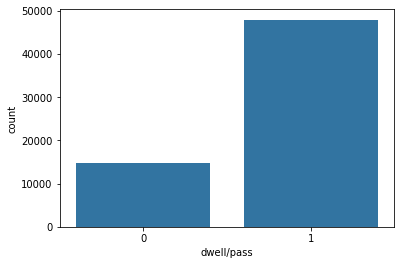

In [12]:
sns.countplot(x="dwell/pass", data=df)

In [13]:
def predict(model, dt, t):
    preds = model.predict(dt)

    preds_binary = [1 if p > 0.5 else 0 for p in preds]

    accuracy = accuracy_score(t[['dwell/pass']], preds_binary)
    f1 = f1_score(t[['dwell/pass']], preds_binary)

    print(f"accuracy_score: {accuracy}")
    print(f"f1_score: {f1}")

<hr>

In [14]:
batch = []
dbatch =[]
batch.append(df[df['week_no'] <= 19]) 
for i in range(20,24):
    batch.append(df[df['week_no'] == i])
for i in batch:
    dbatch.append([i.drop(columns=['dwell/pass', 'week_no', 'dwell/pass']), i['dwell/pass']])

In [15]:
models = []
for i in range(len(batch)):
    if i!=0:
        curr_model = models[i-1].fit(dbatch[i][0], dbatch[i][1])
    else:
        curr_model = RandomForestClassifier(random_state=42,  warm_start=True,n_estimators=200)
        curr_model.fit(dbatch[i][0], dbatch[i][1])
    models.append(curr_model)
    for j in range(len(batch)):
        print(f"Results of data batch {j+1}  with model {i+1}")
        predict(curr_model, dbatch[j][0], batch[j])

Results of data batch 1  with model 1
accuracy_score: 1.0
f1_score: 1.0
Results of data batch 2  with model 1
accuracy_score: 0.8252703471826978
f1_score: 0.8885662431941924
Results of data batch 3  with model 1
accuracy_score: 0.8382049010924122
f1_score: 0.8984432913269087
Results of data batch 4  with model 1
accuracy_score: 0.816297558205565
f1_score: 0.8829806474950262
Results of data batch 5  with model 1
accuracy_score: 0.8596881959910914
f1_score: 0.9156626506024097
Results of data batch 1  with model 2


C:\Users\shang\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


accuracy_score: 1.0
f1_score: 1.0
Results of data batch 2  with model 2
accuracy_score: 0.8252703471826978
f1_score: 0.8885662431941924
Results of data batch 3  with model 2
accuracy_score: 0.8382049010924122
f1_score: 0.8984432913269087
Results of data batch 4  with model 2
accuracy_score: 0.816297558205565
f1_score: 0.8829806474950262
Results of data batch 5  with model 2
accuracy_score: 0.8596881959910914
f1_score: 0.9156626506024097
Results of data batch 1  with model 3


C:\Users\shang\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


accuracy_score: 1.0
f1_score: 1.0
Results of data batch 2  with model 3
accuracy_score: 0.8252703471826978
f1_score: 0.8885662431941924
Results of data batch 3  with model 3
accuracy_score: 0.8382049010924122
f1_score: 0.8984432913269087
Results of data batch 4  with model 3
accuracy_score: 0.816297558205565
f1_score: 0.8829806474950262
Results of data batch 5  with model 3
accuracy_score: 0.8596881959910914
f1_score: 0.9156626506024097
Results of data batch 1  with model 4


C:\Users\shang\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


accuracy_score: 1.0
f1_score: 1.0
Results of data batch 2  with model 4
accuracy_score: 0.8252703471826978
f1_score: 0.8885662431941924
Results of data batch 3  with model 4
accuracy_score: 0.8382049010924122
f1_score: 0.8984432913269087
Results of data batch 4  with model 4
accuracy_score: 0.816297558205565
f1_score: 0.8829806474950262
Results of data batch 5  with model 4
accuracy_score: 0.8596881959910914
f1_score: 0.9156626506024097
Results of data batch 1  with model 5


C:\Users\shang\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


accuracy_score: 1.0
f1_score: 1.0
Results of data batch 2  with model 5
accuracy_score: 0.8252703471826978
f1_score: 0.8885662431941924
Results of data batch 3  with model 5
accuracy_score: 0.8382049010924122
f1_score: 0.8984432913269087
Results of data batch 4  with model 5
accuracy_score: 0.816297558205565
f1_score: 0.8829806474950262
Results of data batch 5  with model 5
accuracy_score: 0.8596881959910914
f1_score: 0.9156626506024097
